In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def plot_max_C_l_vs_Delta(Cs_max_in, Cth_max_in, Cqt_max_in, Delta, y_ax):

    my_lines = ['solid', 'solid', 'dotted', 'dashed', 'dashed', 'dashed']
    labels = ['ML domain', 'CL domain', 'CL: clear sky', 'in-cloud', 'cloudy updraft', 'cloud core']

    colours = ['k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
               'tab:cyan', 'tab:gray', 'tab:brown', 'tab:olive', 'tab:pink']

    if y_ax == 'C':
        y_labels = ['$C_{s}$', '$C_{\\theta}$', '$C_{qt}$']
    else:
        y_labels = ['$l_{s}$ (m)', '$l_{\\theta}$ (m)', '$l_{qt}$ (m)']

    fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(15, 5))
    fig.tight_layout(pad=0.5)

    for it in range(np.shape(Cs_max_in)[0]):
        ax[0].plot(Delta, Cs_max_in[it,...], color=colours[it], linestyle=my_lines[it])
        ax[1].plot(Delta, Cth_max_in[it,...], color=colours[it], linestyle=my_lines[it])
        ax[2].plot(Delta, Cqt_max_in[it,...], color=colours[it], linestyle=my_lines[it], label=labels[it])

    if y_ax == 'C':
        ax[2].legend(fontsize=13, loc='upper right')
    else:
        ax[2].legend(fontsize=13, loc='best')

    bottom0, top0 = ax[0].set_ylim()
    bottom1, top1 = ax[1].set_ylim()
    bottom2, top2 = ax[2].set_ylim()

    set_top = max(top0, top1, top2)

    ax[0].set_ylim(top=set_top)
    ax[1].set_ylim(top=set_top)
    ax[2].set_ylim(top=set_top)

    if y_ax == 'C':
        ax[0].set_ylabel('Smagorinsky Parameter', fontsize=14)
    else:
        ax[0].set_ylabel('Mixing Length', fontsize=14)

    ax[0].set_title(y_labels[0], fontsize=16)
    ax[1].set_title(y_labels[1], fontsize=16)
    ax[2].set_title(y_labels[2], fontsize=16)

    ax[1].set_xlabel('Filter scale $\\widehat{\\bar{\\Delta}}$', fontsize=14)
    plt.savefig(f'max_C_0_prof.png', bbox_inches='tight')
    plt.show()


In [3]:
Cs_sq_cond = np.load('Cs_sq_cond.npy')
Cth_sq_cond = np.load('Cth_sq_cond.npy')
Cqt_sq_cond = np.load('Cqt_sq_cond.npy')

In [4]:
def get_Cs(Cs_sq):
    """ calculates C_s from C_s^2 by setting neg values to zero
    and sq rooting"""

    Cs_sq_copy = Cs_sq.copy()
    Cs_sq_copy[Cs_sq < 0] = 0
    Cs = np.sqrt(Cs_sq_copy)

    return Cs

In [5]:
z_cl_r = [50, 75]
z_ml_r = [6, 20]

In [6]:
def cal_max_Cs(C_list):

    print('when calc the max values, shape of C list is ', np.shape(C_list))

    max_C = np.zeros((np.shape(C_list)[0]+1, np.shape(C_list)[1]-1))

    for i in range(np.shape(C_list)[0]):
        for nD in range(np.shape(C_list)[1]-1):
            if i == 0:
                max_C[i, nD] = np.max(C_list[i, nD+1, z_ml_r[0]:z_ml_r[1]])
                max_C[i+1, nD] = np.max(C_list[i, nD+1, z_cl_r[0]:z_cl_r[1]])
            else:
                max_C[i+1, nD] = np.max(C_list[i, nD+1, z_cl_r[0]:z_cl_r[1]])

    print('shape of max C is ', np.shape(max_C))
    return max_C

max_Cs_sq_cond = cal_max_Cs(Cs_sq_cond)
max_Cth_sq_cond = cal_max_Cs(Cth_sq_cond)
max_Cqt_sq_cond = cal_max_Cs(Cqt_sq_cond)

max_Cs_cond = get_Cs(max_Cs_sq_cond)
max_Cth_cond = get_Cs(max_Cth_sq_cond)
max_Cqt_cond = get_Cs(max_Cqt_sq_cond)

when calc the max values, shape of C list is  (5, 7, 151)
shape of max C is  (6, 6)
when calc the max values, shape of C list is  (5, 7, 151)
shape of max C is  (6, 6)
when calc the max values, shape of C list is  (5, 7, 151)
shape of max C is  (6, 6)


In [7]:
Delta = ['2$\\Delta$', '4$\\Delta$', '8$\\Delta$', '16$\\Delta$', '32$\\Delta$', '64$\\Delta$']

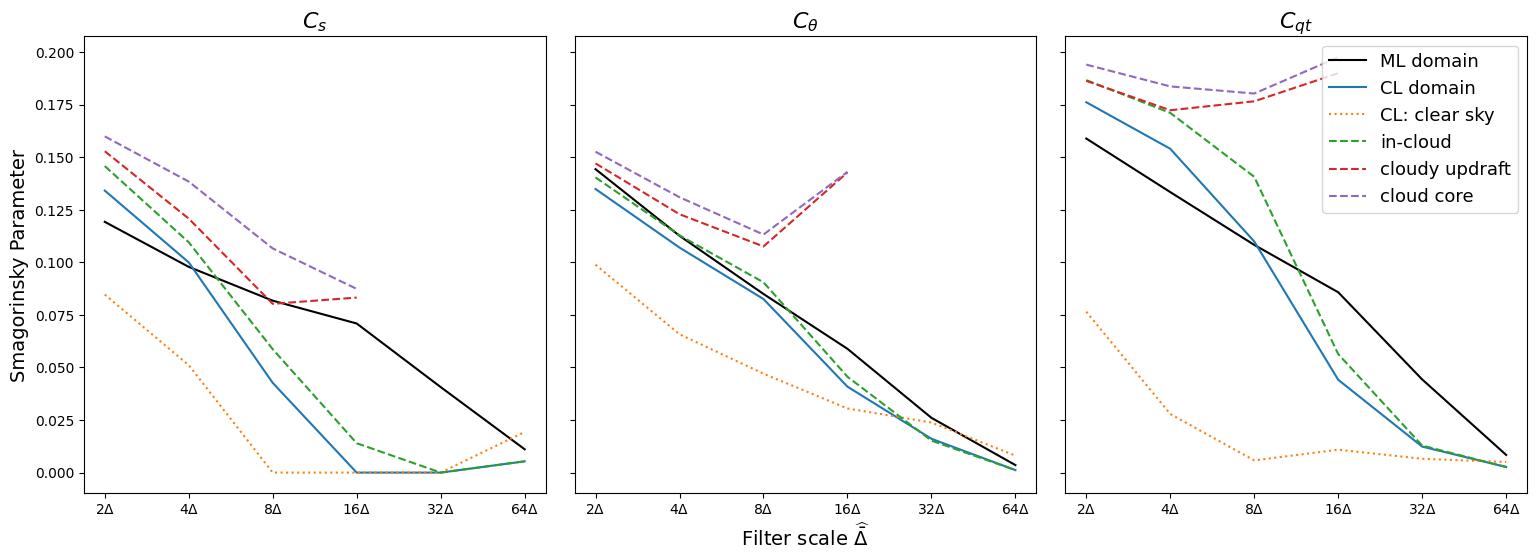

In [10]:
plot_max_C_l_vs_Delta(max_Cs_cond, max_Cth_cond, max_Cqt_cond, Delta, 'C')